<a href="https://colab.research.google.com/github/cibelerusso/Aprendizado_de_Maquina/blob/main/Codigos%20em%20Python/Redes_recorrentes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado profundo com redes recorrentes

-  Representação, manipulação e visualização

-  Caracterização de redes dinâmicas

-  Modelagem de redes dinâmicas

por **Cibele Russo**

Baseado em

- KOLACZYK, E. D., CSÁRDI, G. Statistical Analysis of Network Data with R, Springer. 2014. Disponível em https://www.aguia.usp.br/ebooks/

- CHO, K., VAN MERRIËNBOER, B., GULCEHRE, C., BAHDANAU, D., BOUGARES, F., SCHWENK, H., & BENGIO, Y. Learning phrase representations using RNN encoder-decoder for statistical machine translation. 2014. arXiv preprint arXiv:1406.1078.

- HOCHREITER, S., & SCHMIDHUBER, J. Long short-term memory. Neural computation, 9(8), 1735-1780. 1997.

Implementações:

- https://www.tensorflow.org/guide/keras/rnn

- https://github.com/keras-team/keras-io/blob/master/guides/working_with_rnns.py



Leituras e materiais adicionais recomendados:

- https://otexts.com/fpp2/nnetar.html

- https://www.youtube.com/watch?v=aircAruvnKk

- https://www.youtube.com/watch?v=Ilg3gGewQ5U





Podemos representar uma rede neural artificial com um único neurônio na forma de um perceptron, com duas entradas, uma saída, uma função de ativação e eventualmente um viés como abaixo.


Neurônios artificiais: perceptron

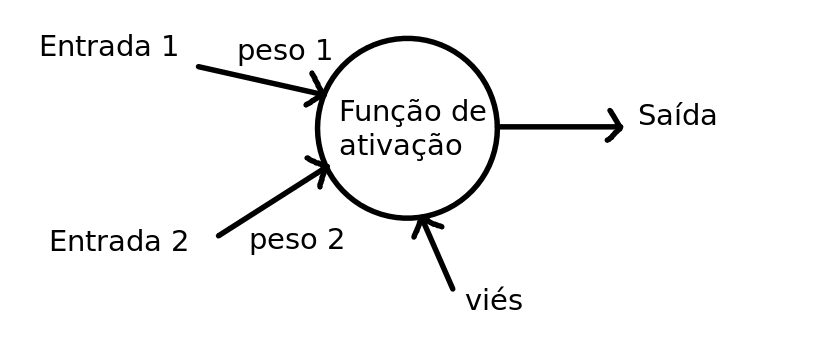




Já uma rede neural tem vários neurônios e camadas de entrada, saída e camadas escondidas, o que dá origem a uma rede neural artificial não linear:

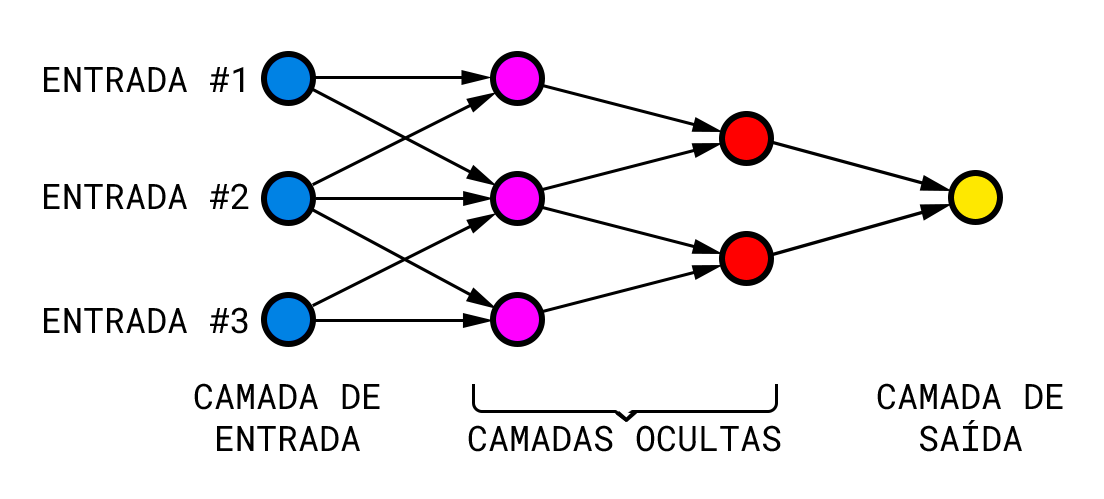




Cada camada de nós recebe entradas das camadas anteriores. As saídas dos nós em uma camada são entradas para a próxima camada. As entradas para cada nó são combinadas usando uma combinação linear ponderada. O resultado é então modificado por uma função não linear antes de ser produzido. Esse modelo é chamado de multilayer feed-forward network.


As entradas em um neurônio da primeria camada oculta são combinadas linearmente, por exemplo, da seguinte forma


$$z_j = b_j + \sum_{i=1}^{3}w_{i,j} x_{i}.$$


Então, na camada oculta, passam por uma função de ativação, por exemplo

$$s(z) = \displaystyle\frac{1}{1+e^{-z}}$$

e passam a ser entrada da próxima camada oculta, onde passarão por um procedimento similar e passarão para a camada de saída. Os parâmetros em cada passo são estimados de forma a minimizar, por exemplo, o erro quadrático médio.




Curiosidade: Site para visualizar algumas aplicações de redes neurais artificiais:

http://playground.tensorflow.org/

Mais sobre funções de ativação:

https://7-hiddenlayers.com/deep-learning-2/


### Redes Neurais Recorrentes (RNN)

Existem diversos tipos de redes neurais artificiais que podemos utilizar para a análise de dados de séries temporais. Algumas delas são as redes neurais recorrentes (RNN), que servem para modelar dados sequenciais, como séries temporais, dados que vem de arquivos de audio, trajetórias de carros, etc.

Para isso suponha um neurônio na multilayer feed-forward network, que permite que sua saída seja novamente uma entrada para si mesmo:

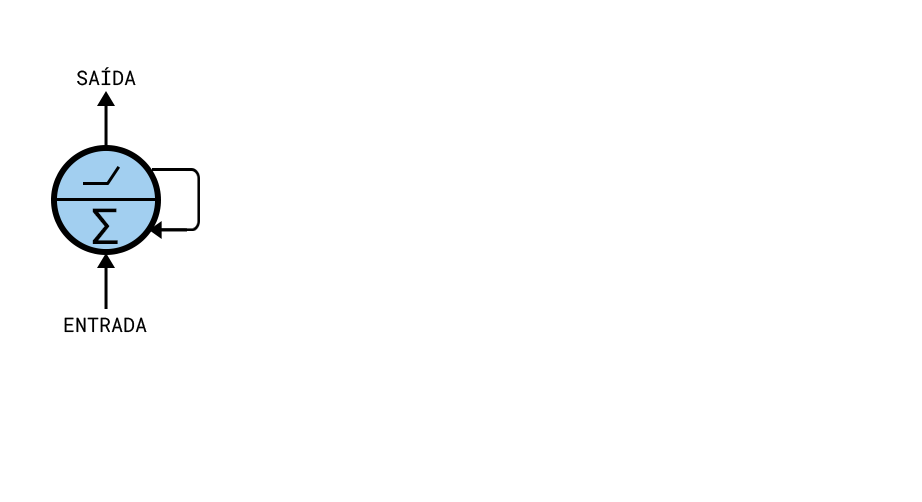





E então imagine que temos esse comportamento possível ao longo do tempo:

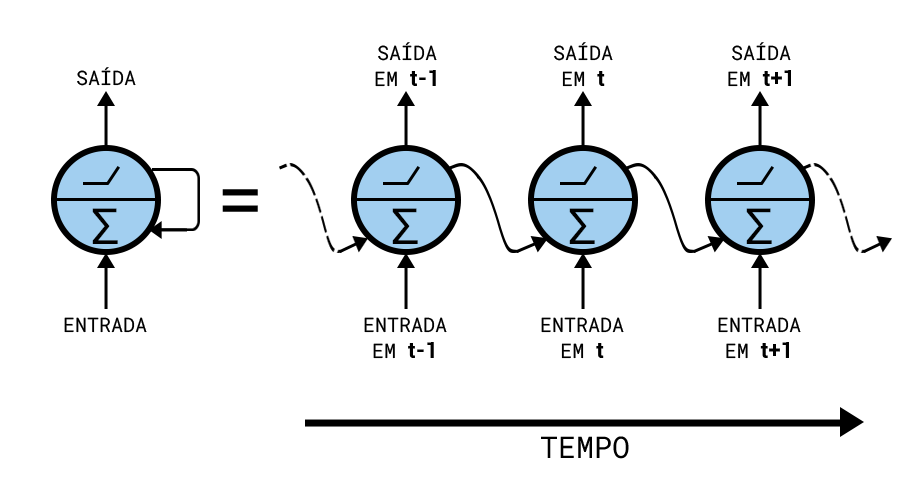

Dessa forma, poderíamos combinar as multilayers feed-forward networks sequencialmente. Note que existe uma espécie de memória, já que a estrutura do modelo se repete ao longo do tempo.


As RNN estão implementadas no pacote Keras em três propostas:

1. `keras.layers.SimpleRNN`, um RNN totalmente conectado, onde a saída do passo anterior no tempo deve ser alimentado para o próximo instante de tempo.

2. `keras.layers.GRU` (Gated recurrent unit) proposto por
[CHO et al., 2014](https://arxiv.org/abs/1406.1078).

3. `keras.layers.LSTM`, (Long Short Term Memory) proposto por
[HOCHREITER & SCHMIDHUBER, 1997](https://www.bioinf.jku.at/publications/older/2604.pdf).






## LSTM = Long Short-Term Memory


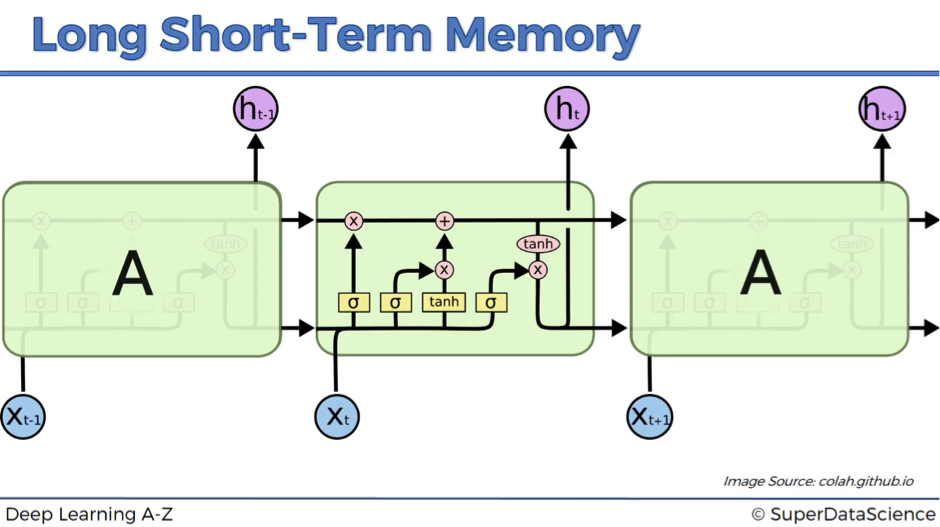


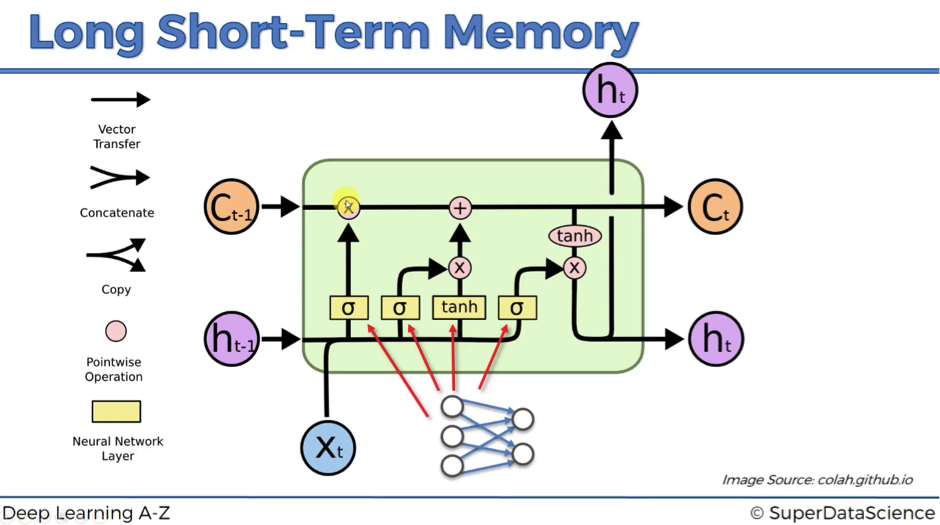

Fonte: https://www.superdatascience.com/blogs/recurrent-neural-networks-rnn-long-short-term-memory-lstm


Notação

- $c_{t-1}$ representa a entrada de uma célula de memória no momento $t$;

- $x_t$ é uma entrada no ponto de tempo $t$;

- $h_t$ é uma saída no ponto de tempo $t$ que vai para a camada de saída e a camada oculta no próximo ponto de tempo.



Assim, cada bloco tem três entradas $(x_t, h_{t-1} \mbox{ e } c_{t-1})$ e duas saídas $(h_t \mbox{ e } c_t)$. É importante observar que todas essas entradas e saídas não são valores únicos, mas vetores com muitos valores por trás de cada um deles.

Para mais informações, veja [HOCHREITER & SCHMIDHUBER, 1997](https://www.bioinf.jku.at/publications/older/2604.pdf), https://en.wikipedia.org/wiki/Long_short-term_memory e https://www.youtube.com/watch?v=8HyCNIVRbSU.




## GRU - Gated recurrent unit

É como o LSTM simplificado, não tem porta de esquecimento.

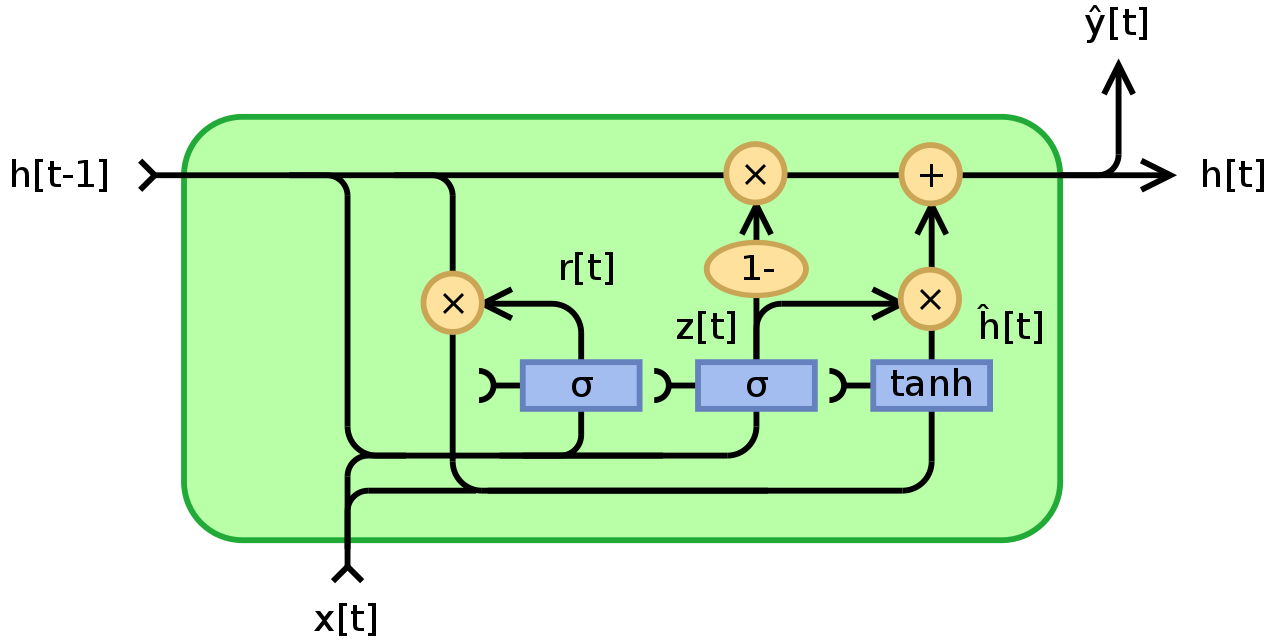


Fonte: https://en.wikipedia.org/wiki/Gated_recurrent_unit


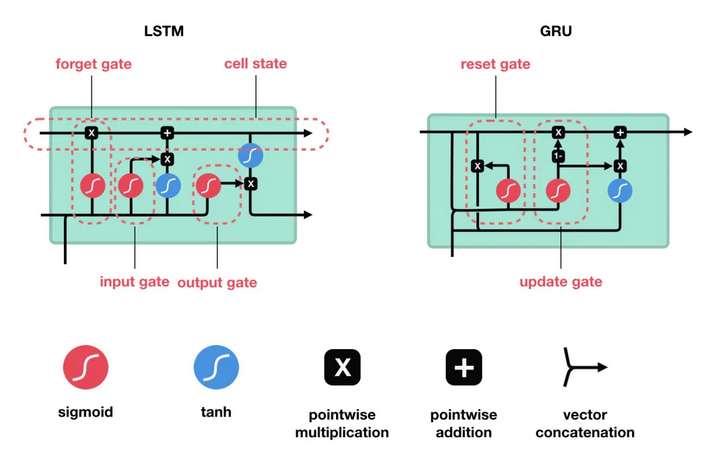


Fonte: http://deeplearningbook.com.br/arquitetura-de-redes-neurais-gated-recurrent-unit-gru/
        



## Modelagem de redes neurais artificiais


Começaremos com um exemplo mais simples e depois partiremos para a RNN.

In [189]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Um modelo simples do tipo  y=mx+b+ruído

In [190]:
m = 3
b = 4
x = np.linspace(0,50,100)

np.random.seed(0)
ruído = np.random.normal(loc=0.0,scale=8.0,size=len(x))

(array([ 1.,  5.,  7., 13., 17., 18., 16., 11.,  7.,  5.]),
 array([-20.42391853, -16.56572297, -12.70752742,  -8.84933187,
         -4.99113632,  -1.13294077,   2.72525478,   6.58345034,
         10.44164589,  14.29984144,  18.15803699]),
 <BarContainer object of 10 artists>)

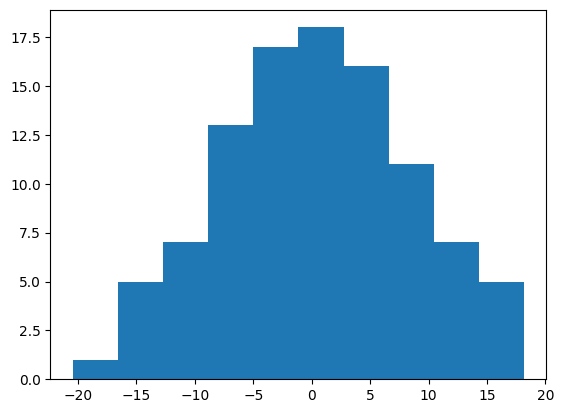

In [191]:
plt.hist(ruído)

In [192]:
y = m*x + b + ruído

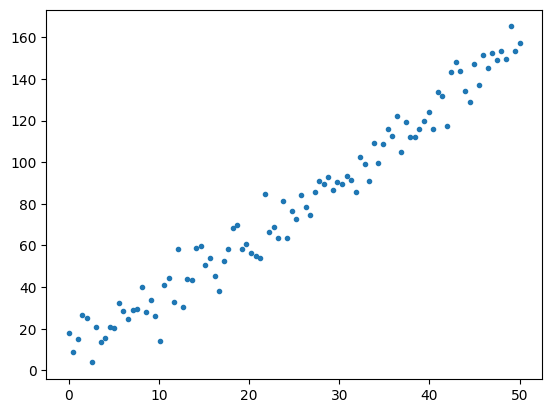

In [193]:
plt.plot(x,y,'.')

## Criação de uma rede neural para uma reta de melhor ajuste usando o pacote Keras



In [194]:
# https://keras.io/
# https://keras.io/guides/sequential_model/
# Otimizadores: https://keras.io/api/optimizers/

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense


In [195]:
#Vamos criar um modelo com 3 camadas

model = Sequential()

# 4 neurônios, esperando apenas 1 recurso com input_dim = 1
model.add(Dense(4, input_dim=1, activation='relu'))

# 4 neurônios (modifique para ver o resultado)
model.add(Dense(4, activation='relu'))

# Uma saída final de y, então apenas 1 neurônio
model.add(Dense(1, activation='linear'))

# Compile as camadas
model.compile(loss='mse', optimizer='adam')

In [196]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_26 (Dense)            (None, 4)                 8         
                                                                 
 dense_27 (Dense)            (None, 4)                 20        
                                                                 
 dense_28 (Dense)            (None, 1)                 5         
                                                                 
Total params: 33 (132.00 Byte)
Trainable params: 33 (132.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [197]:
model.fit(x, y, epochs=500, verbose=0)

## Prever novos x pontos

Nosso x anterior era de 100 pontos de espaço entre 0 e 50. Vamos prever 1000 valores entre 0 e 50, desenhando uma linha para nossas previsões (nossa linha de melhor ajuste).




In [198]:
x_for_predictions = np.linspace(0,50,1000)

In [199]:
y_predicted = model.predict(x_for_predictions)

32/32 [==============================] - 0s 2ms/step


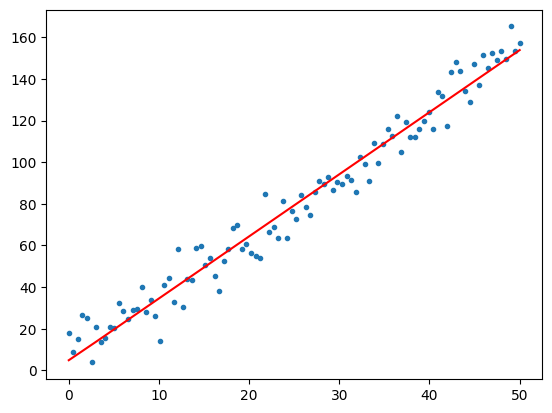

In [200]:
# X e Y originais
plt.plot(x,y,'.')

# Reta prevista
plt.plot(x_for_predictions,y_predicted,'r')

# Avaliação do erro

In [201]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [202]:
prediction_for_true_y = model.predict(x)

4/4 [==============================] - 0s 3ms/step


In [203]:
mean_squared_error(y,prediction_for_true_y)

64.70560984364133

In [204]:
mean_absolute_error(y,prediction_for_true_y)

6.440855535658764

Como interpretar esse resultado? Depende da comparação com outros modelos!

## Modelagem de séries temporais usando o Keras



In [205]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

<Axes: >

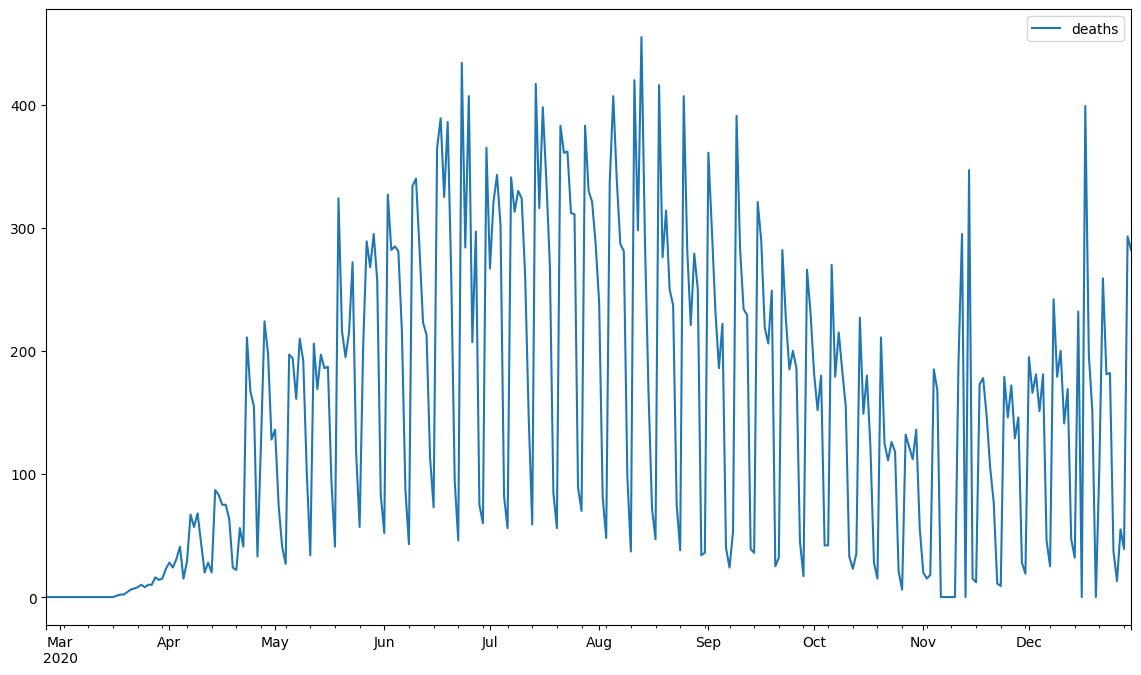

In [206]:
# Leitura dos dados de COVID-19 no estado de SP - vamos trabalhar com as mortes

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/covidSP.csv', index_col='date', parse_dates=True)
df = df.drop('confirmed', axis=1)

idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='D')
df = df.reindex(idx)
df.fillna(0,inplace=True)

df.plot(figsize=(14,8))

In [207]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Axes: >

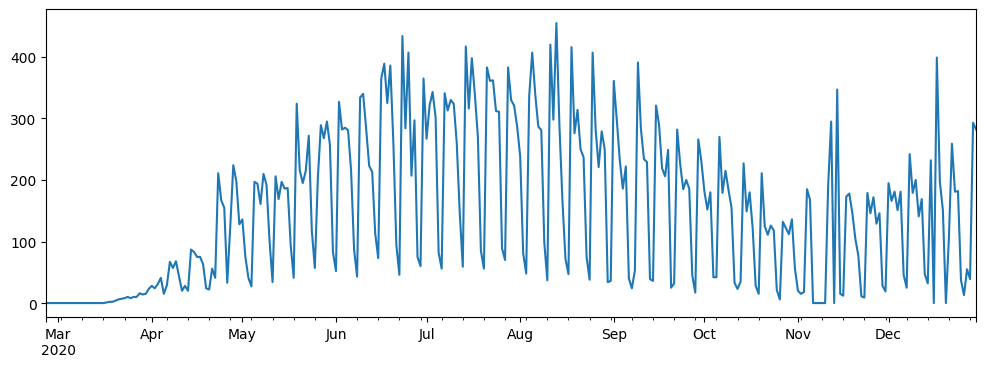

In [208]:
results = seasonal_decompose(df)
results.observed.plot(figsize=(12,4))

<Axes: >

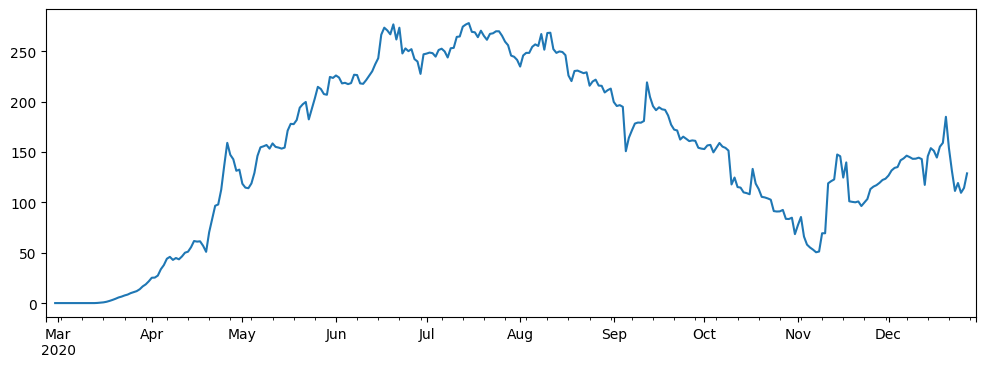

In [209]:
results.trend.plot(figsize=(12,4))

<Axes: >

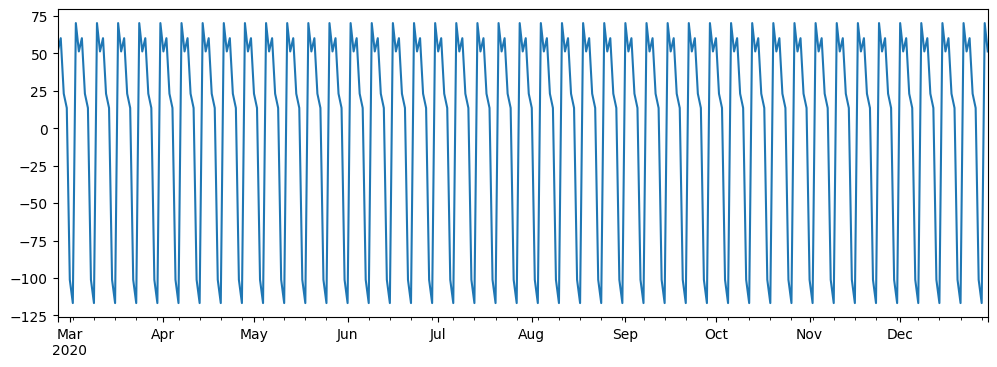

In [210]:
results.seasonal.plot(figsize=(12,4))

<Axes: >

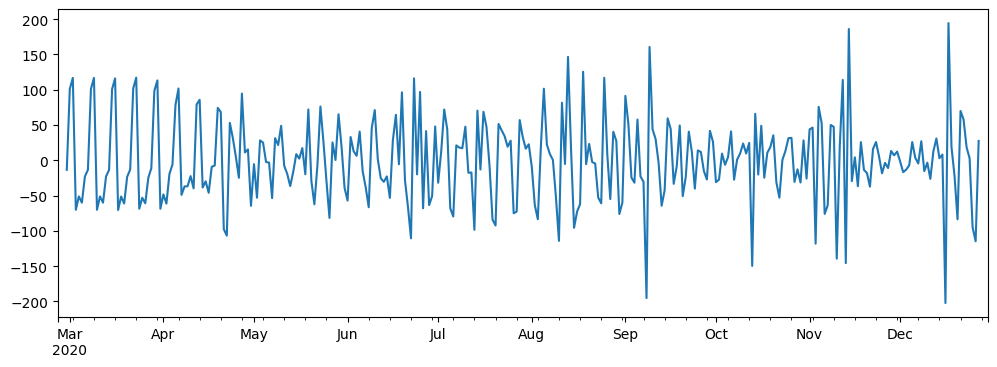

In [211]:
results.resid.plot(figsize=(12,4))

<Axes: >

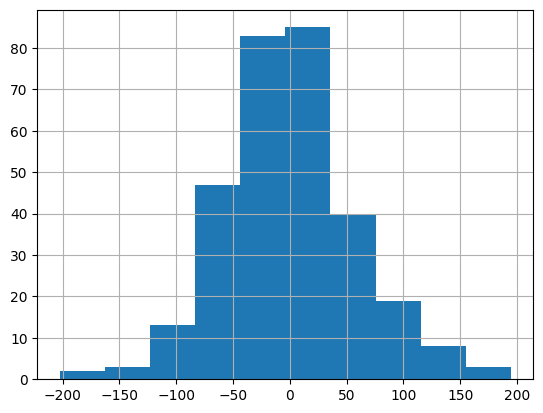

In [212]:
results.resid.hist()

In [213]:
results.resid[3:-3]

2020-02-29    -13.492784
2020-03-01    101.195528
2020-03-02    116.766428
2020-03-03    -70.157160
2020-03-04    -51.230250
                 ...    
2020-12-23     18.484036
2020-12-24      2.786361
2020-12-25    -95.439552
2020-12-26   -114.778498
2020-12-27     27.481242
Freq: D, Name: resid, Length: 303, dtype: float64

(array([-50, -49, -48, -47, -46, -45, -44, -43, -42, -41, -40, -39, -38,
        -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25,
        -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
        -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,
          2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
         28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
         41,  42,  43,  44,  45,  46,  47,  48,  49,  50]),
 array([ 0.05147292,  0.10558197,  0.02456402,  0.02094992, -0.00508303,
        -0.12350632, -0.11313574,  0.09326685,  0.11719412,  0.01527039,
         0.00715515,  0.01812476, -0.20214146, -0.09846196,  0.06153716,
         0.31800958, -0.01863949,  0.00263982, -0.17358516, -0.0793992 ,
        -0.14344937,  0.1177344 ,  0.24922492,  0.08316567, -0.10884436,
        -0.08630931, -0.11395748, -0.1299904 ,  0.04088265,  0.3

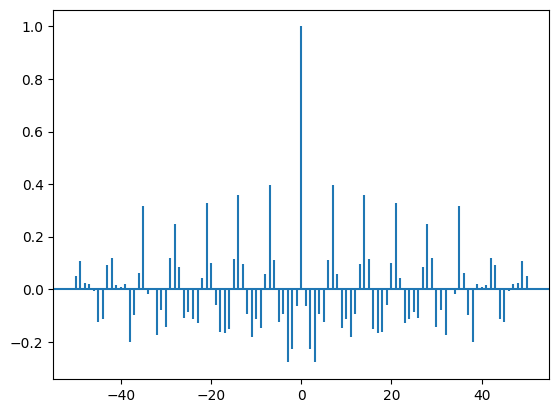

In [214]:
plt.acorr(results.resid.values[3:-3], maxlags = 50)

## Divida a base em treino e teste

In [215]:
len(df)-21


288

In [216]:
train = df.iloc[:-21]
test = df.iloc[-21:]

In [217]:
train.shape

(288, 1)

## Importante: Os dados precisam estar padronizados

In [218]:
from sklearn.preprocessing import MinMaxScaler

In [219]:
scaler = MinMaxScaler()

In [220]:
scaler.fit(train)

MinMaxScaler()

In [221]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [222]:
print(scaled_train.min(),scaled_train.max())

0.0 1.0


In [223]:
print(scaled_test.min(),scaled_test.max())

0.0 0.8769230769230769


(array([91., 34., 20., 25., 36., 19., 27., 20., 11.,  5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

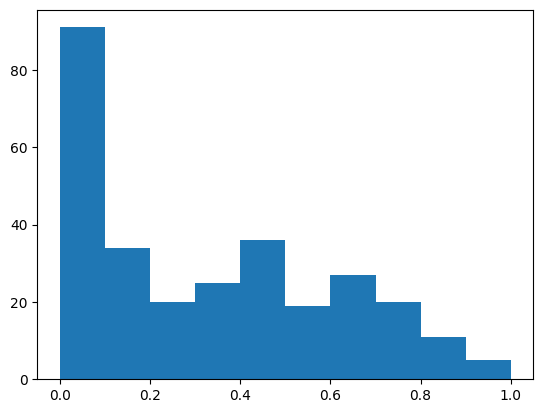

In [224]:
plt.hist(scaled_train)

### Gerador de séries temporais


In [225]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

Sobre o gerador de séries temporais:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/TimeseriesGenerator

Utility class for generating batches of temporal data.

This class takes in a sequence of data-points gathered at equal intervals, along with time series parameters such as stride, length of history, etc., to produce batches for training/validation. Arguments

- data: Indexable generator (such as list or Numpy array) containing consecutive data points (timesteps). The data should be at 2D, and axis 0 is expected to be the time dimension.
    
- targets: Targets corresponding to timesteps in data. It should have same length as data.
    
- length: Length of the output sequences (in number of timesteps).
        
- sampling_rate: Period between successive individual timesteps within sequences. For rate r, timesteps data[i], data[i-r], ... data[i - length] are used for create a sample sequence.
    
- stride: Period between successive output sequences. For stride s, consecutive output samples would be centered around data[i], data[i+s], data[i+2*s], etc.
    
- start_index: Data points earlier than start_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.
    
- end_index: Data points later than end_index will not be used in the output sequences. This is useful to reserve part of the data for test or validation.
    
- shuffle: Whether to shuffle output samples, or instead draw them in chronological order.
    
- reverse: Boolean: if true, timesteps in each output sample will be in reverse chronological order.
    
- batch_size: Number of timeseries samples in each batch (except maybe the last one).
    


In [226]:
# defina o gerador
n_input = 2
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [227]:
len(scaled_train)

288

In [228]:
len(generator) # n_input = 2

286

In [272]:
# Vamos redefinir lotes de tamanho 7 para o procedimento iterativo
# Veja mais informações sobre o tamanho do lote http://deeplearningbook.com.br/o-efeito-do-batch-size-no-treinamento-de-redes-neurais-artificiais/

n_input = 6
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=7)

In [273]:
# Qual é a aparência do primeiro lote?
X,y = generator[0]

In [274]:
print(f'Dado o array: \n{X.flatten()}');
print(f'Previsão: \n {y}');

Dado o array: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Previsão: 
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


### Crie o modelo

In [275]:
### Pacote ideal do tensorflow = 2.5
### Pacote ideal do keras = 2.6
### Caso necessário, instale o pacote nessas versões

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [276]:
Sequential

keras.src.engine.sequential.Sequential

In [277]:
# Defina o modelo
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [278]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100)               40800     
                                                                 
 dense_31 (Dense)            (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [279]:
# Ajuste do modelo

model.fit(generator,epochs=250)

Epoch 1/250
41/41 [==============================] - 2s 5ms/step - loss: 0.0951
Epoch 2/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0564
Epoch 3/250
41/41 [==============================] - 0s 5ms/step - loss: 0.0543
Epoch 4/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0520
Epoch 5/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0497
Epoch 6/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0485
Epoch 7/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0458
Epoch 8/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0447
Epoch 9/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0453
Epoch 10/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0415
Epoch 11/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0408
Epoch 12/250
41/41 [==============================] - 0s 6ms/step - loss: 0.0402
Epoch 13/250
41/41 [=================

In [280]:
model.history.history.keys()

dict_keys(['loss'])

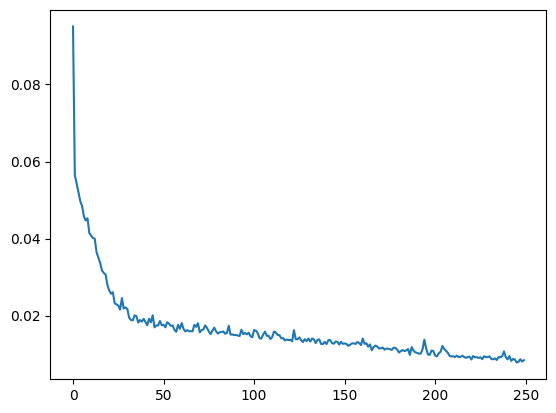

In [281]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

## Avalie em dados de teste

In [282]:
# Vejamos passo a passo como é feita a previsão, a princípio para a próxima observação usando o tamanho do lote igual a 7

first_eval_batch = scaled_train[-6:]

In [283]:
first_eval_batch

array([[0.33186813],
       [0.3978022 ],
       [0.1010989 ],
       [0.05494505],
       [0.53186813],
       [0.39340659]])

In [284]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [285]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 190ms/step


array([[0.40396243]], dtype=float32)

In [286]:
scaled_test[0]

array([0.43956044])

In [287]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [288]:
current_batch.shape

(1, 6, 1)

In [289]:
current_batch

array([[[0.33186813],
        [0.3978022 ],
        [0.1010989 ],
        [0.05494505],
        [0.53186813],
        [0.39340659]]])

In [290]:
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[3.97802198e-01],
        [1.01098901e-01],
        [5.49450549e-02],
        [5.31868132e-01],
        [3.93406593e-01],
        [9.90000000e+01]]])

In [291]:
# Agora vamos considerar as previsões para as próximas 21 observações e comparar com a base de teste

test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # obter a previsão de tempo 1 antecipadamente ([0] é para pegar apenas o número em vez de [array])
    current_pred = model.predict(current_batch)[0]

    # predição
    test_predictions.append(current_pred)

    # atualize a rodada para agora incluir a previsão e descartar o primeiro valor
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 21ms/step


In [292]:
test_predictions

[array([0.40396243], dtype=float32),
 array([0.37754214], dtype=float32),
 array([0.39827803], dtype=float32),
 array([0.13504767], dtype=float32),
 array([0.0419647], dtype=float32),
 array([0.5059299], dtype=float32),
 array([0.4768241], dtype=float32),
 array([0.4414614], dtype=float32),
 array([0.40623727], dtype=float32),
 array([0.41613576], dtype=float32),
 array([0.12264892], dtype=float32),
 array([0.03937958], dtype=float32),
 array([0.55330867], dtype=float32),
 array([0.5080209], dtype=float32),
 array([0.45081347], dtype=float32),
 array([0.41845986], dtype=float32),
 array([0.42642072], dtype=float32),
 array([0.11327797], dtype=float32),
 array([0.03883735], dtype=float32),
 array([0.56914467], dtype=float32),
 array([0.5166292], dtype=float32)]

In [293]:
scaled_test

array([[0.43956044],
       [0.30989011],
       [0.37142857],
       [0.1032967 ],
       [0.07032967],
       [0.50989011],
       [0.        ],
       [0.87692308],
       [0.43296703],
       [0.33186813],
       [0.        ],
       [0.23516484],
       [0.56923077],
       [0.3978022 ],
       [0.4       ],
       [0.08131868],
       [0.02857143],
       [0.12087912],
       [0.08571429],
       [0.64395604],
       [0.61978022]])

## Retorno da padronização e comparação

In [294]:
true_predictions = scaler.inverse_transform(test_predictions)

In [295]:
true_predictions

array([[183.80290717],
       [171.78167284],
       [181.21650264],
       [ 61.44669175],
       [ 19.09393786],
       [230.19809872],
       [216.95496768],
       [200.86494341],
       [184.83795986],
       [189.34176996],
       [ 55.80526069],
       [ 17.91770972],
       [251.75544292],
       [231.14949942],
       [205.12012988],
       [190.39923742],
       [194.02142689],
       [ 51.54147714],
       [ 17.67099466],
       [258.96082312],
       [235.06629467]])

In [296]:
# Possivelmente encontraremos warnings aqui
test['Predictions'] = true_predictions

<ipython-input-296-b5be589fc0d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: >

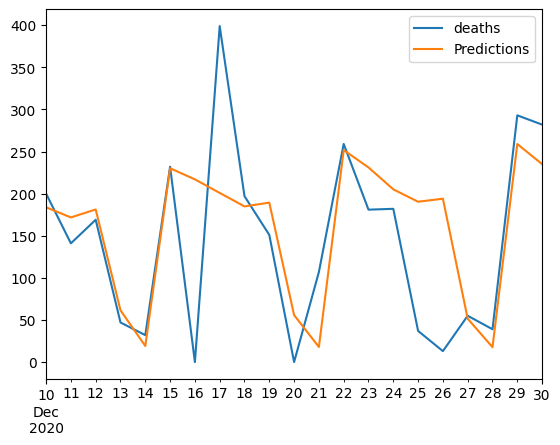

In [297]:
test.plot()

<Axes: >

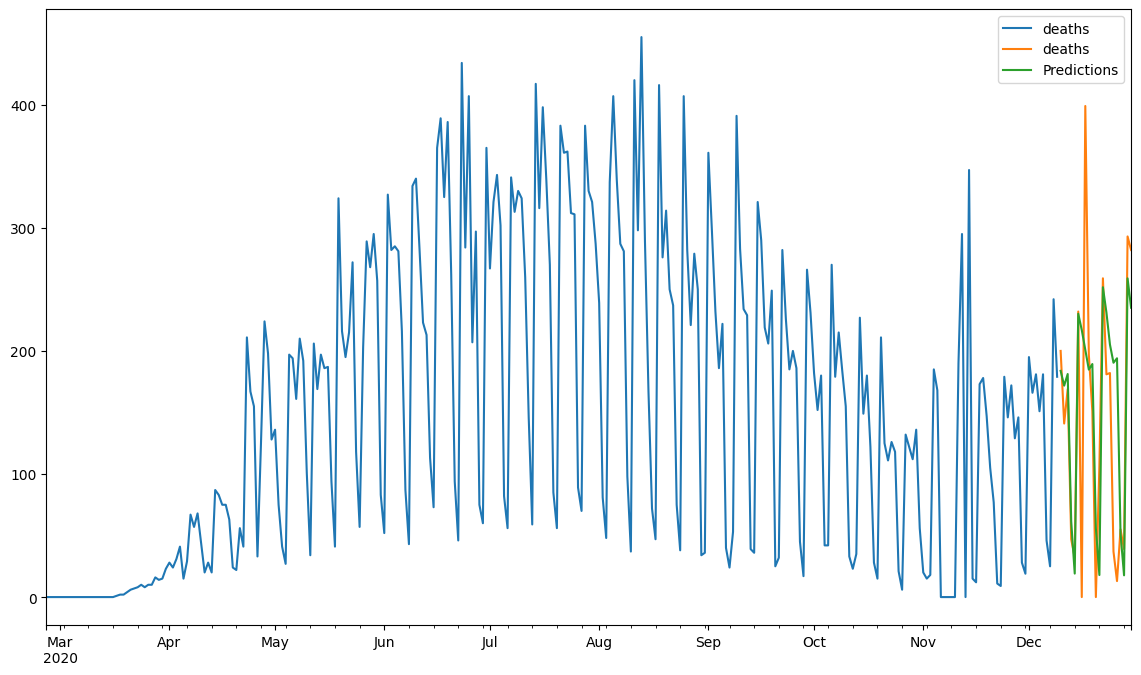

In [298]:
ax = train.plot(figsize=(14,8))
test.plot(ax=ax)

# Você pode salvar suas previsões

In [299]:
model.save('my_rnn_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## E carregá-las depois

In [ ]:
from tensorflow.keras.models import load_model
new_model = load_model('my_rnn_model.h5')

In [ ]:
new_model.summary()

Outras formas de modelagem de séries temporais usando redes neurais artificiais:

- https://ai.facebook.com/blog/ar-net-a-simple-autoregressive-neural-network-for-time-series/

- https://otexts.com/fpp2/nnetar.html

